In [92]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score


Sobre o conjunto de dados

Contexto

Esses dados são os resultados de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três diferentes cultivares. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos.

Atributos do conjunto de dados:

* Alcohol - Representa o teor alcoólico do vinho. Níveis moderados de álcool podem indicar um bom equilíbrio, enquanto níveis muito altos ou baixos podem afetar o sabor e a estrutura do vinho.
* Malic acid - Um dos principais ácidos orgânicos do vinho, contribuindo para a acidez e o frescor. Níveis apropriados são essenciais para o equilíbrio do sabor.
* Ash - Refere-se ao conteúdo mineral do vinho. Pode influenciar a estabilidade e a complexidade do vinho.
* Alcalinity of ash - Medida da alcalinidade dos sais minerais presentes. Influencia o pH do vinho e, portanto, sua estabilidade e capacidade de envelhecimento.
* Magnesium - Um mineral que pode influenciar a fermentação e a estabilidade do vinho.
* Total phenols - Compostos químicos que afetam a cor, o sabor e a sensação na boca. Contribuem para a complexidade e a capacidade de envelhecimento do vinho.
* Flavanoids - Subgrupo de fenóis que influenciam a cor e o sabor, especialmente em vinhos tintos. Contribuem para a adstringência e a capacidade antioxidante.
* Nonflavanoid phenols - Outro subgrupo de fenóis que, embora menos abundantes, também afetam o sabor e a cor do vinho.
* Proanthocyanins - Tipo de tanino que contribui para a cor, a adstringência e a capacidade antioxidante do vinho.
* Color intensity - Medida da cor do vinho. Uma cor intensa pode ser indicativa de um vinho de boa qualidade, especialmente em vinhos tintos.
* Hue - Refere-se à tonalidade da cor do vinho. Pode indicar a idade e a qualidade do vinho; por exemplo, vinhos tintos jovens tendem a ter uma tonalidade mais roxa, enquanto vinhos envelhecidos podem ter uma tonalidade mais tijolo.
* OD280/OD315 of diluted wines - Medida da absorção de luz UV, que pode estar relacionada ao conteúdo de fenóis e, portanto, à capacidade antioxidante e à estabilidade do vinho.
* Proline - Um aminoácido que pode ser usado como indicador da maturidade das uvas e da qualidade do vinho. Níveis mais altos podem estar associados a vinhos de melhor qualidade.

In [94]:

# Carregar os dados
data = pd.read_csv('wine.data')
true_labeled_data = pd.read_csv("true_label.csv")

# Exibir as primeiras linhas do dataframe
data.head()


Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  
0                          3.92     1065  
1                          3.40     1050  
2                          3.17     1185  
3                          3.45     1480  
4                          2.93      735

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [96]:
data.describe()

Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color intensity         Hue  OD280/OD315 of diluted wines      Proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

 # Análise Exploratória de Dados (EDA)

In [97]:
# Verificar valores nulos
print(data.isnull().sum())


Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


In [98]:
col = list(data.columns)
numerical_features = [*col]
print('Numerical Features :',*numerical_features)

Numerical Features : Alcohol Malic acid Ash Alcalinity of ash Magnesium Total phenols Flavanoids Nonflavanoid phenols Proanthocyanins Color intensity Hue OD280/OD315 of diluted wines Proline


C:\Users\jefer\AppData\Local\Temp\ipykernel_19364\980189799.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerical_features[i]],color = colors[0])
C:\Users\jefer\AppData\Local\Temp\ipykernel_19364\980189799.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerical_features[i

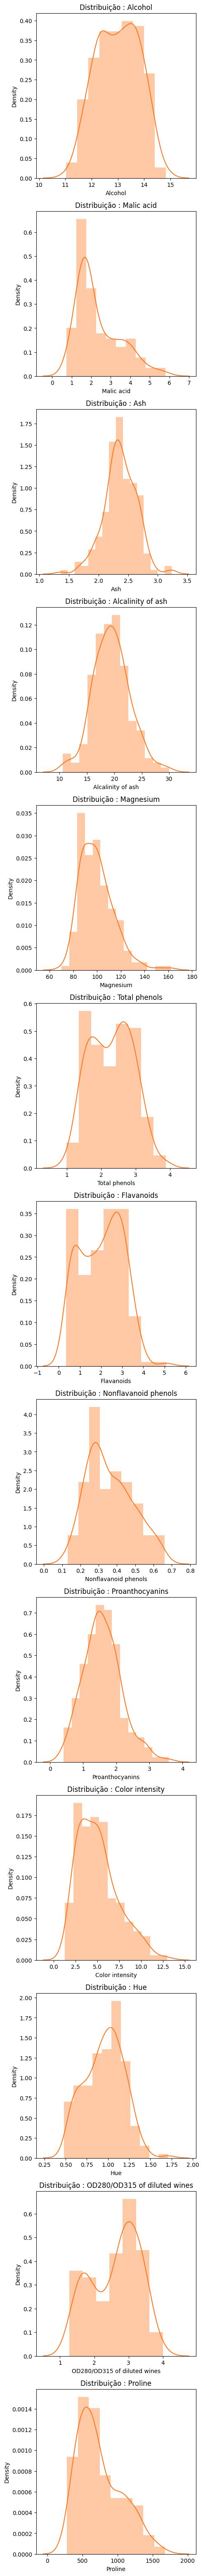

In [99]:
# Plotar a distribuição de cada variável
colors = ['#FF781F','#2D2926']
fig, ax = plt.subplots(nrows = 13,ncols = 1,figsize = (5,80))
for i in range(len(numerical_features)):
    plt.subplot(13,1,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribuição : ' + numerical_features[i]
    plt.title(title)
plt.show()

* É possível identificar uma similaridade entre as curvas para Flavonoids, OD280/OD315 e Total Phenols.


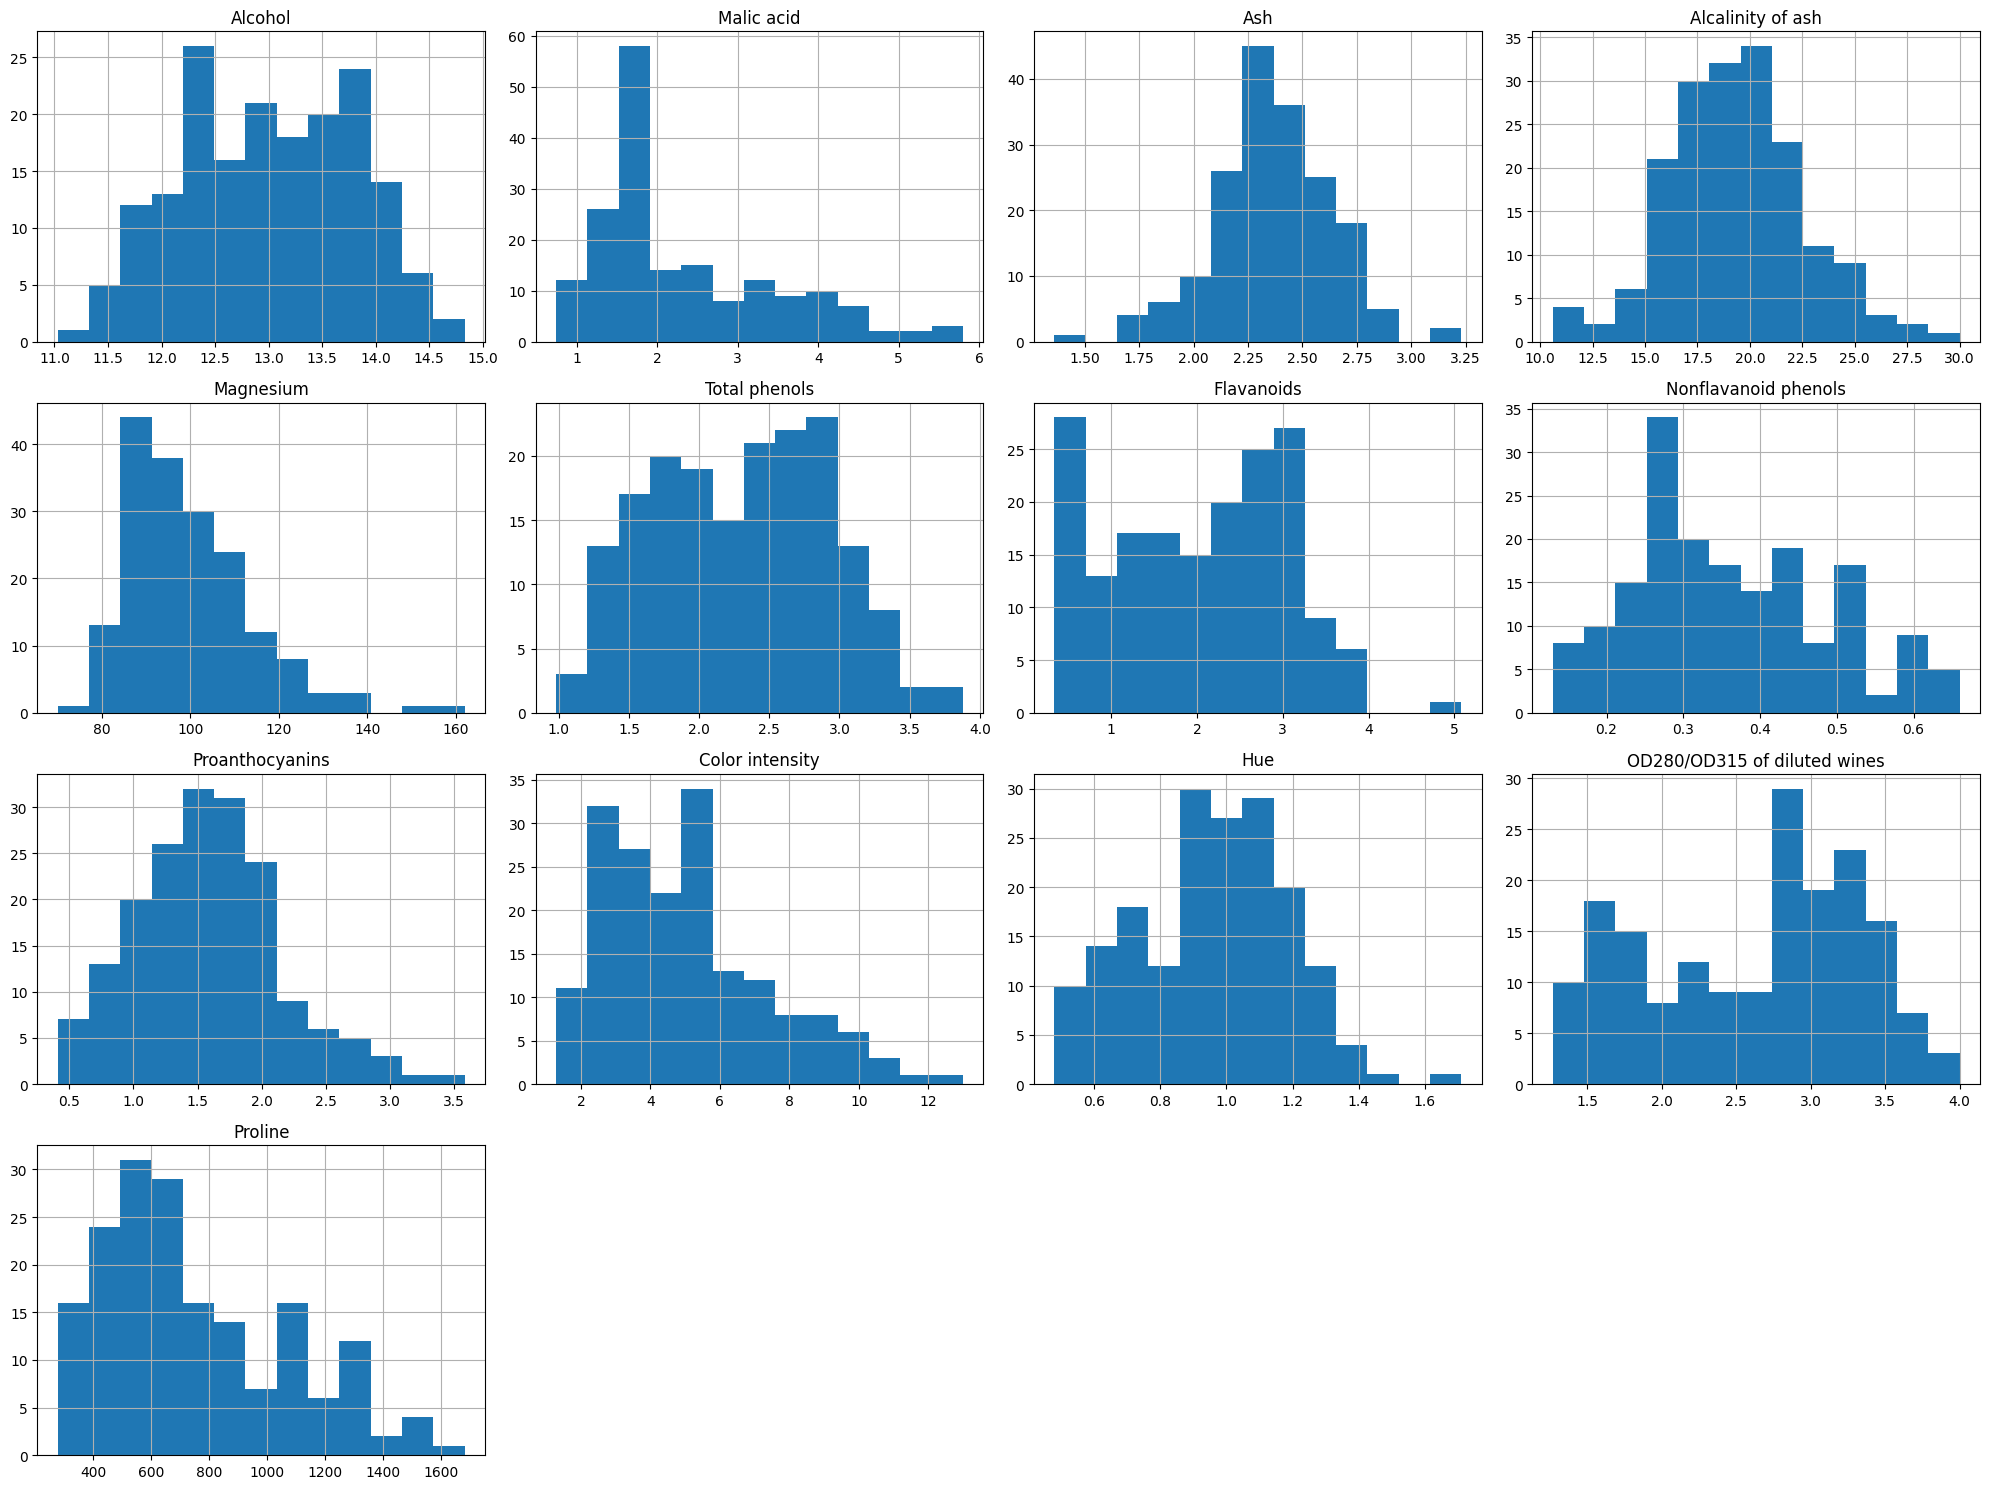

In [100]:
data.hist(bins=13, figsize=(20, 15))
plt.tight_layout()
plt.show()


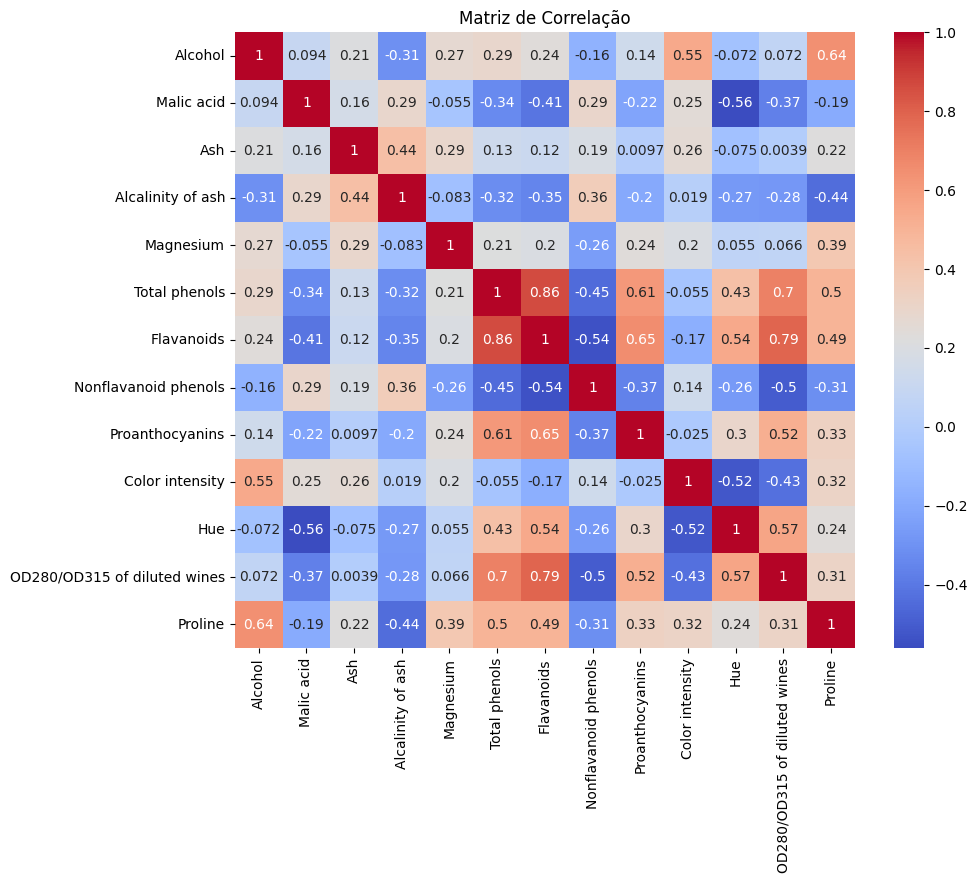

In [101]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


A correlação entre Flavanoids e Total Phenols é maior que a relação entre estes dois e OD280/OD315, portanto iremos utilizar os dois primeiros atributos para realizar o agrupamento.

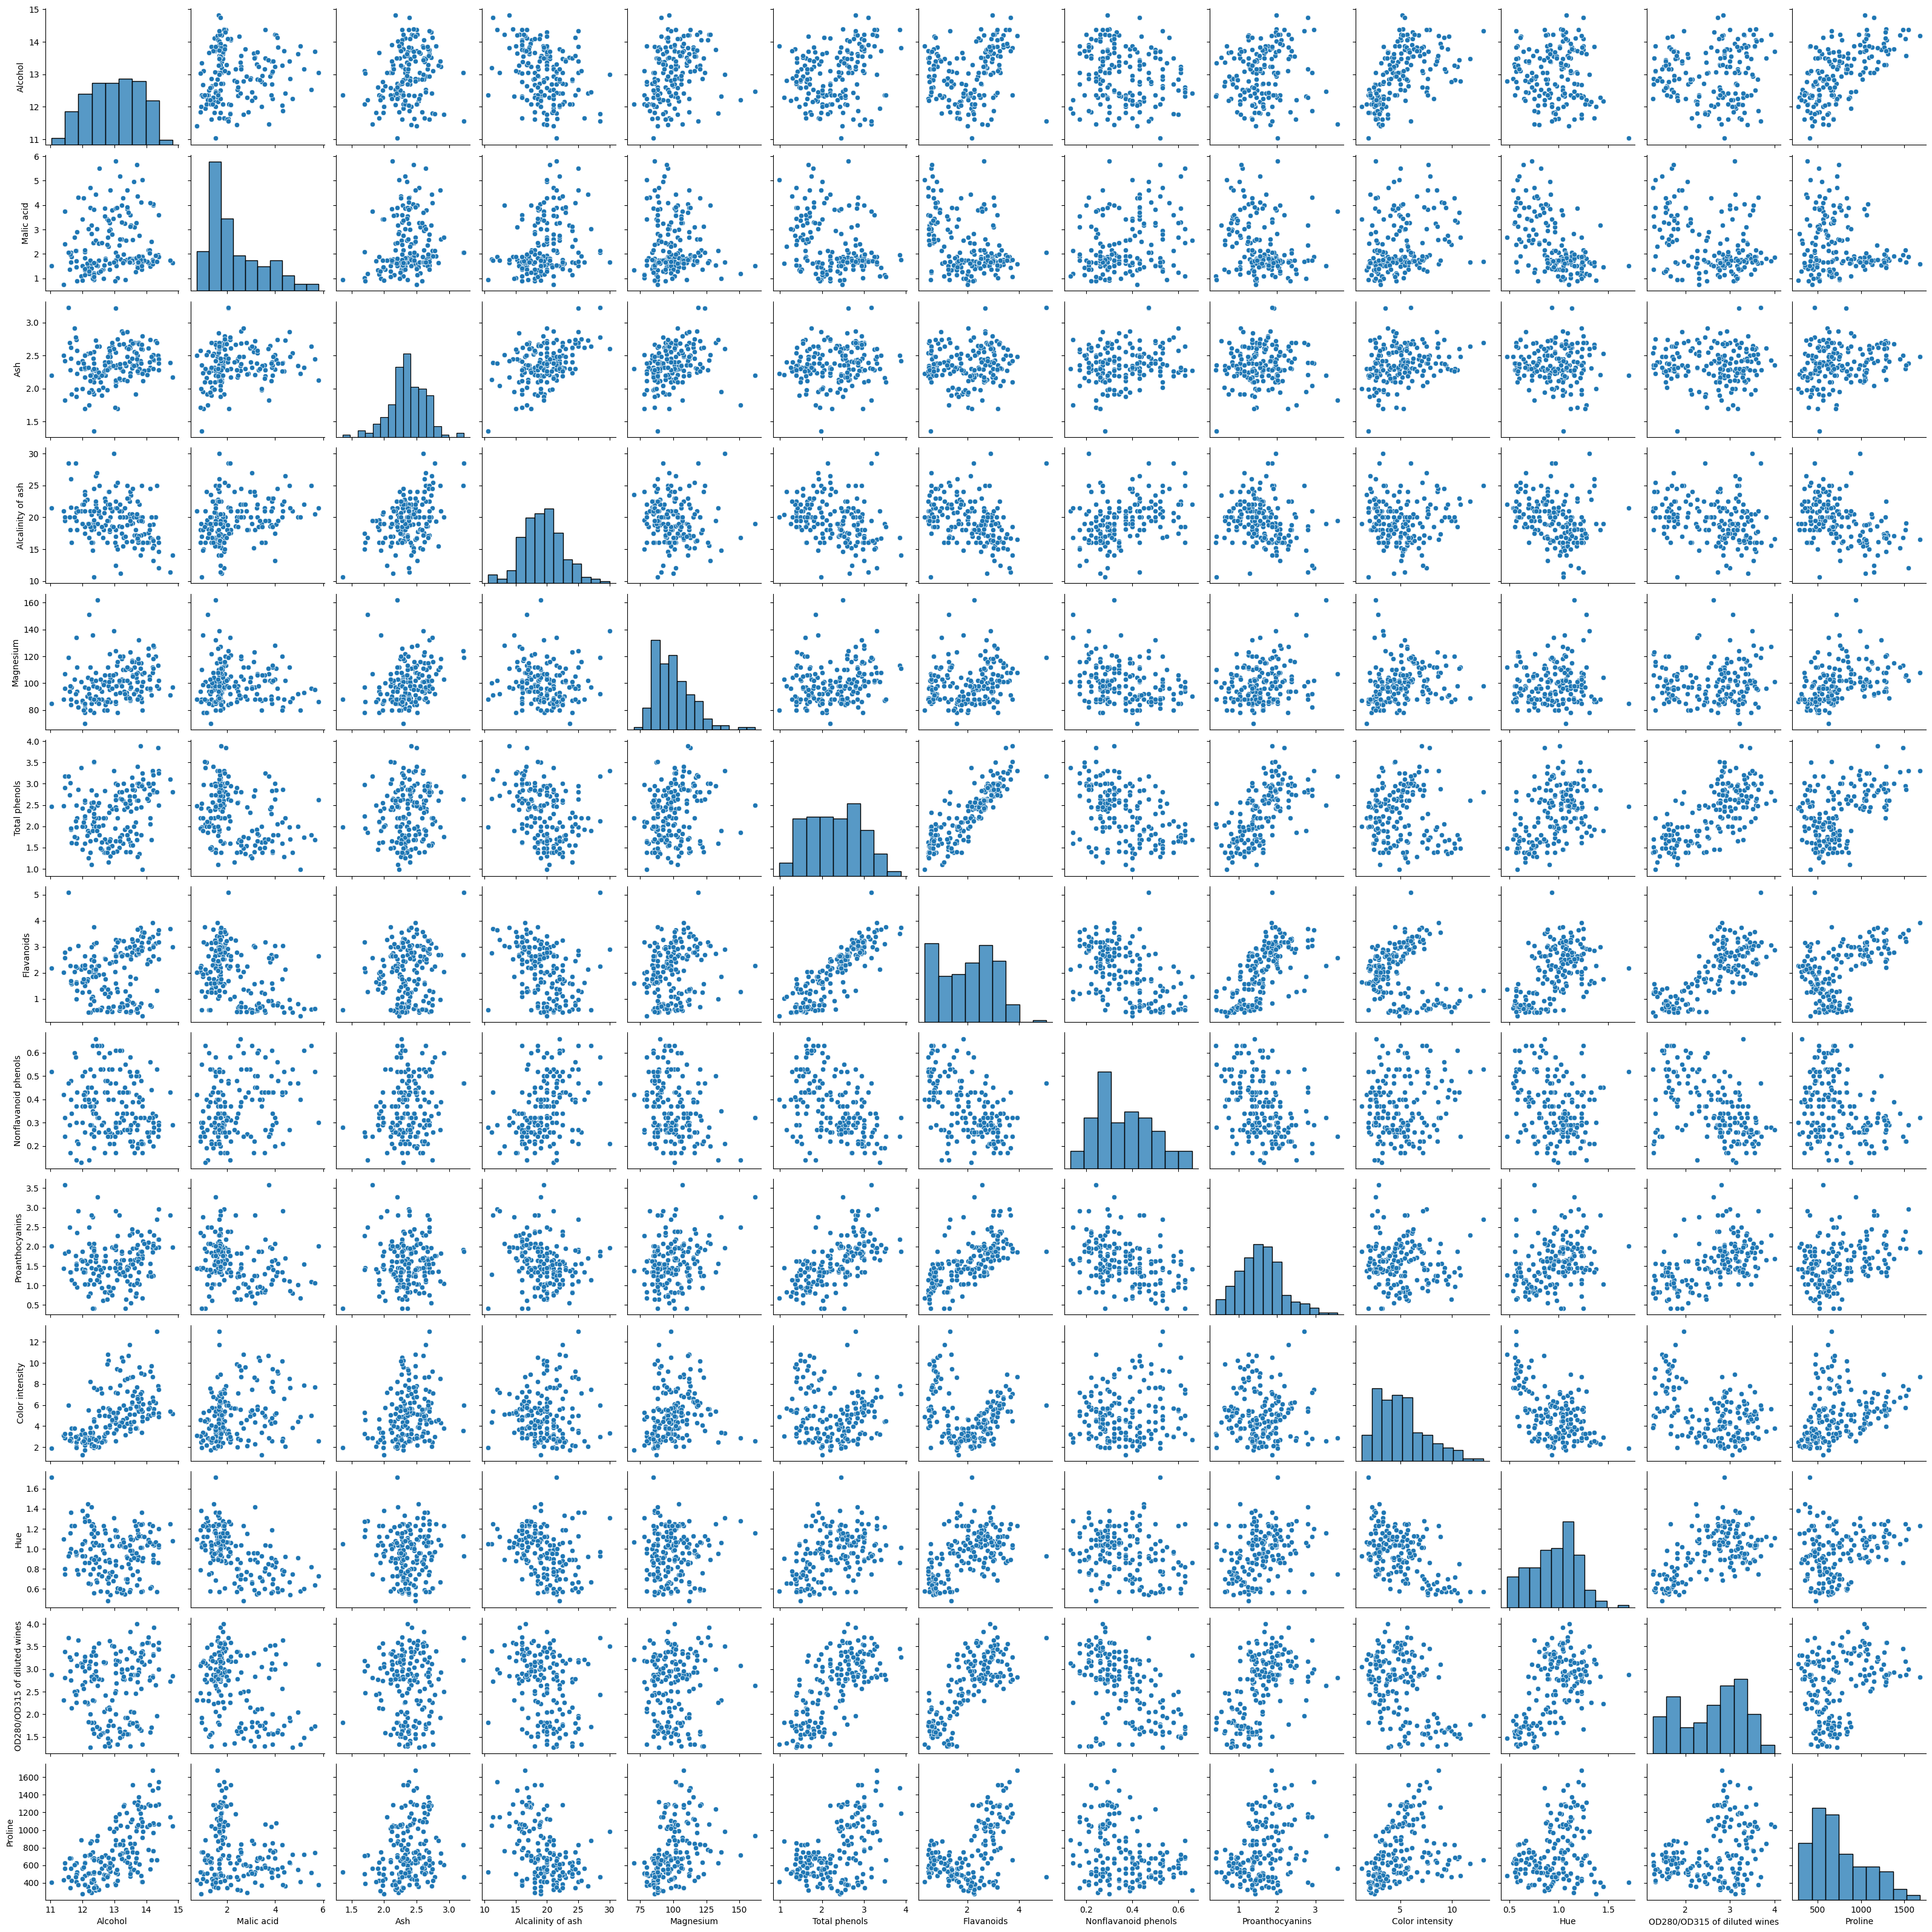

In [102]:
sns.pairplot(data)
plt.show()

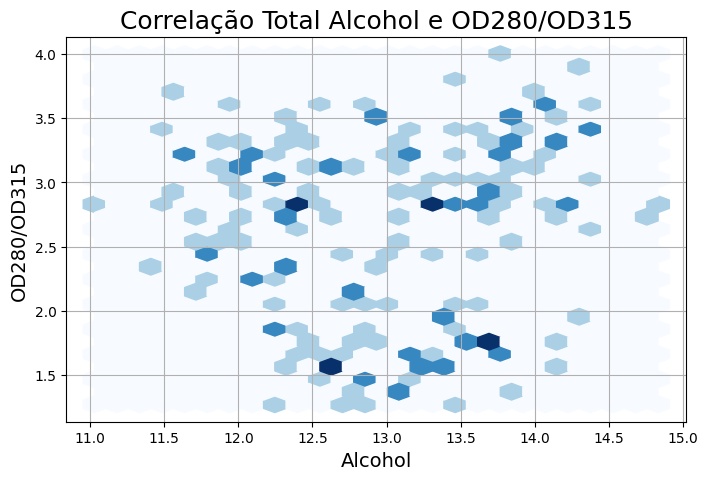

In [103]:
plt.figure(figsize=(8,5))
plt.title("Correlação Total Alcohol e OD280/OD315",fontsize=18)
plt.xlabel ("Alcohol",fontsize=14)
plt.ylabel ("OD280/OD315",fontsize=14)
plt.grid(True)
plt.hexbin(data['Alcohol'],data['OD280/OD315 of diluted wines'], gridsize=25, cmap='Blues')
plt.show()

Analisando o gráfico resultante da relação entre Flavanoids e Total phenols é possível identificar 3 possíveis grupos.

# Pré-processamento dos Dados

In [104]:
data_filter = data

print('Linha total : ', len(data_filter))

Linha total :  178


In [105]:
sf_data = StandardScaler()
data_scaled = sf_data.fit_transform(data_filter.astype(float))
true_labels = true_labeled_data['Cluster']

# Implementação dos Algoritmos de Clusterização


In [106]:
# Calcular os centróides dos clusters
def calculate_centroids(X, labels):
    centroids = []
    for i in np.unique(labels):
        centroids.append(X[labels == i].mean(axis=0))
    return np.array(centroids)

# Calcular o SSE
def calculate_sse(X, labels):
    centroids = calculate_centroids(X, labels)

    sse = 0
    for i in np.unique(labels):
        cluster_points = X[labels == i]
        centroid = centroids[i]
        sse += np.sum((cluster_points - centroid) ** 2)
    return sse

## K-Means

### Pseudocodigo

```
Selecione K objetos como centróides
Repita
    Forme K grupos associando cada objeto ao seu centróide mais próximo
    Recalcule os centróides de cada grupo
Até que Convergência seja obtida    
```
Fonte: Introduction to Data Mining Pang-Ning Tan - Algorithm 8.1 Basic K-means algorithm.

Silhouette Score para K-Means: 0.2848589191898987
Davies-Bouldin Score para K-Means: 1.3891879777181648
SSE K-Means: 1277.9284888446423
RandIndex K-Means: 0.8974949815093207
Total elementos por grupo: {0: 65, 1: 51, 2: 62}


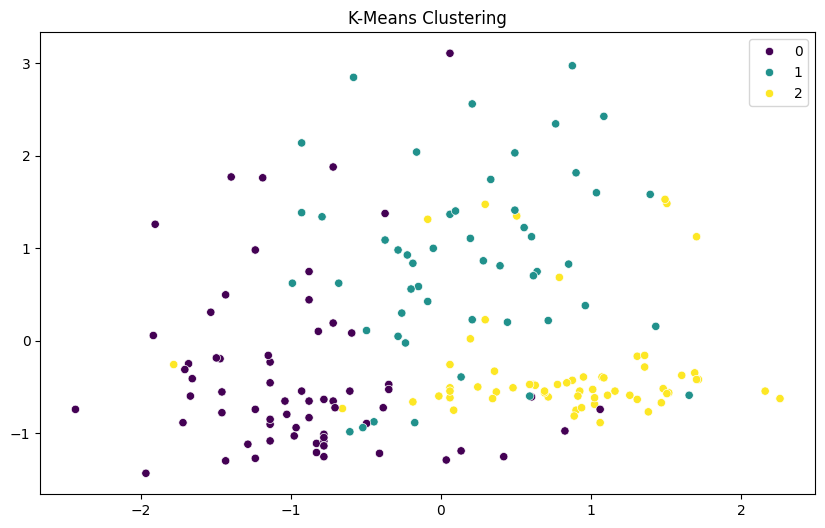

In [107]:
# Aplicar o K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Avaliação usando a medida de Silhouette
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(data_scaled, kmeans_labels)
sse_kmeans = calculate_sse(data_scaled, kmeans_labels)
rand_index_kmeans = adjusted_rand_score(true_labels, kmeans_labels)

print(f'Silhouette Score para K-Means: {silhouette_kmeans}')
print(f'Davies-Bouldin Score para K-Means: {davies_bouldin_kmeans}')
print(f'SSE K-Means: {sse_kmeans}')
print(f'RandIndex K-Means: {rand_index_kmeans}')

unique_labels, counts = np.unique(kmeans_labels, return_counts=True)

results = dict(zip(unique_labels, counts))
print(f'Total elementos por grupo: {results}')

# Visualização dos resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')
plt.show()


<Figure size 1500x1500 with 0 Axes>

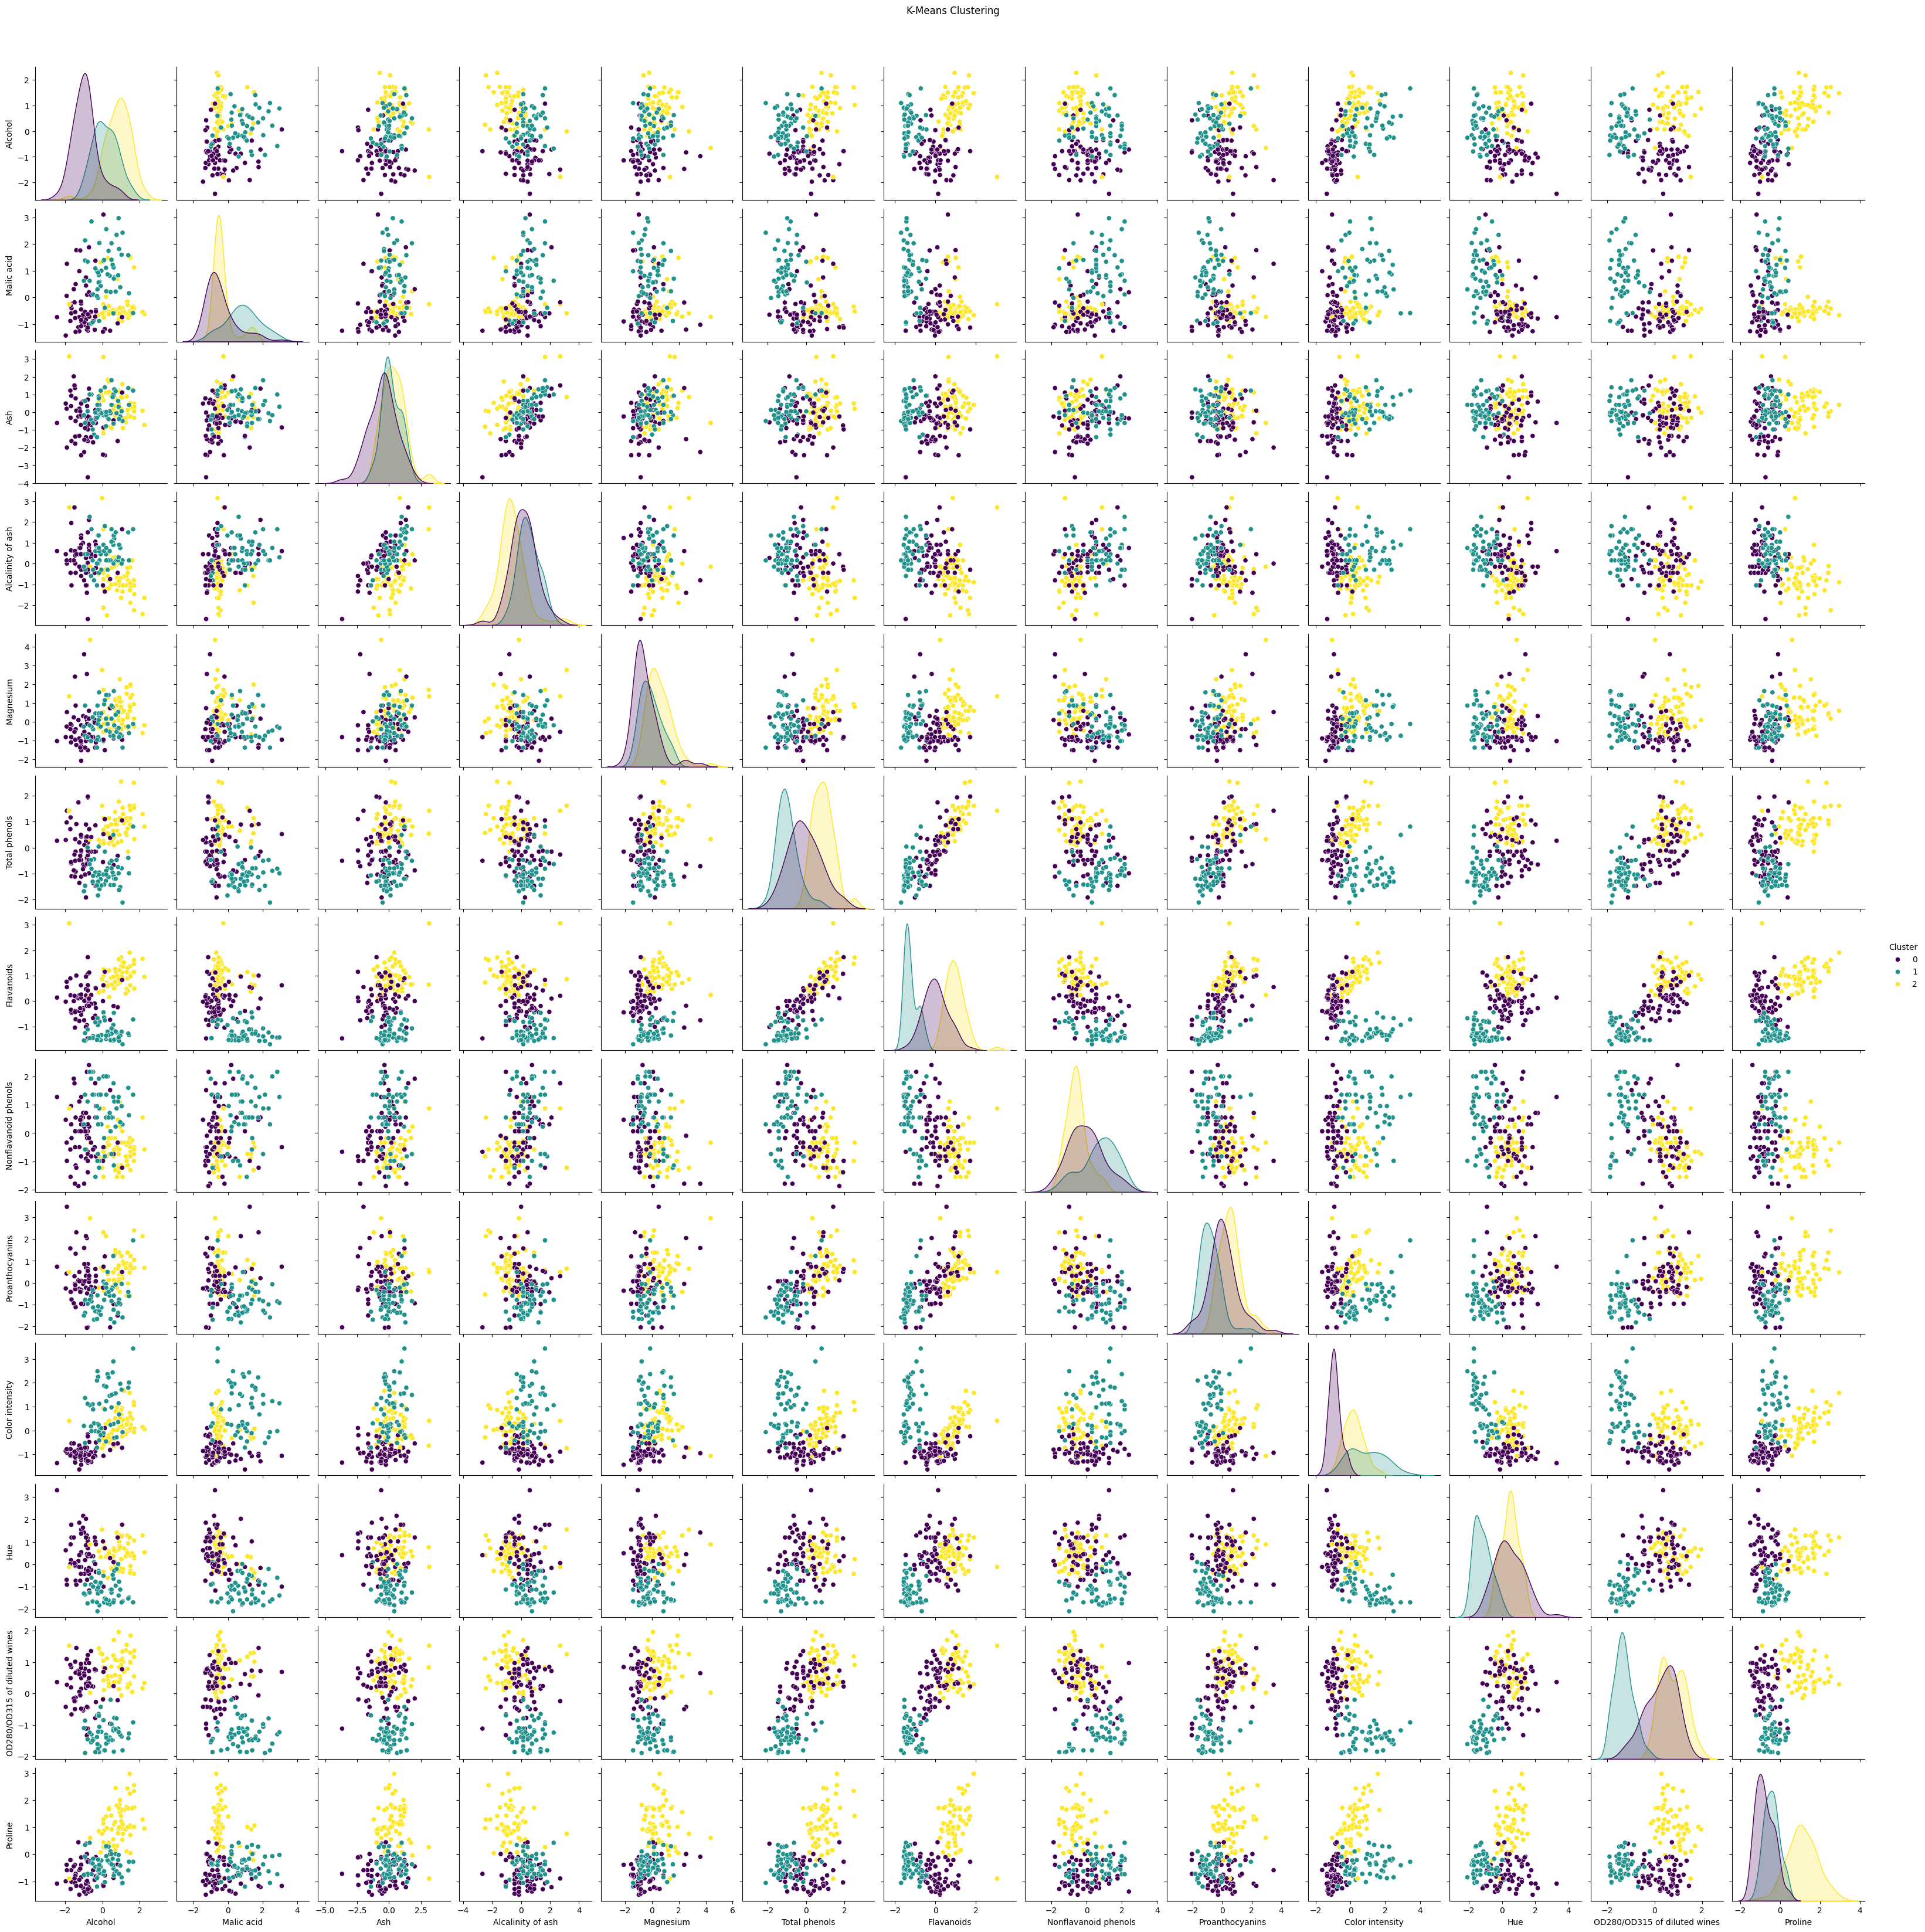

In [108]:
# Converta data_scaled de volta para um DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

# Adicione a coluna de rótulos
data_scaled_df['Cluster'] = kmeans_labels

# Crie o gráfico de pares colorido pelos rótulos do K-Means
plt.figure(figsize=(15, 15))
pairplot = sns.pairplot(data_scaled_df, hue='Cluster', palette='viridis', diag_kind='kde')
pairplot.fig.suptitle('K-Means Clustering', y=1.02)  # Título
plt.show()

## Aglomerative Clustering

### Pseudocodigo
```
Calcule a matrix de proximidade se necessário
Repita
    Una os dois clusters mais próximos
    Atualize a matrix de proximidade para refletir a proximidade entre o novo cluster gerado e os clusters originais
Até Apenas um cluster existir
```
Fonte: Introduction to Data Mining Pang-Ning Tan - Algorithm 8.3 Basic agglomerative hierarchical clustering algorithm

Silhouette Score para Aglomerative Clustering: 0.2774439826952265
Davies-Bouldin Score para Aglomerative Clustering: 1.4185919431857326
SSE Aglomerative Clustering: 1305.0486950052536
RandIndex Aglomerative Clustering: 0.7899332213582837
Total elementos por grupo: {0: 58, 1: 56, 2: 64}


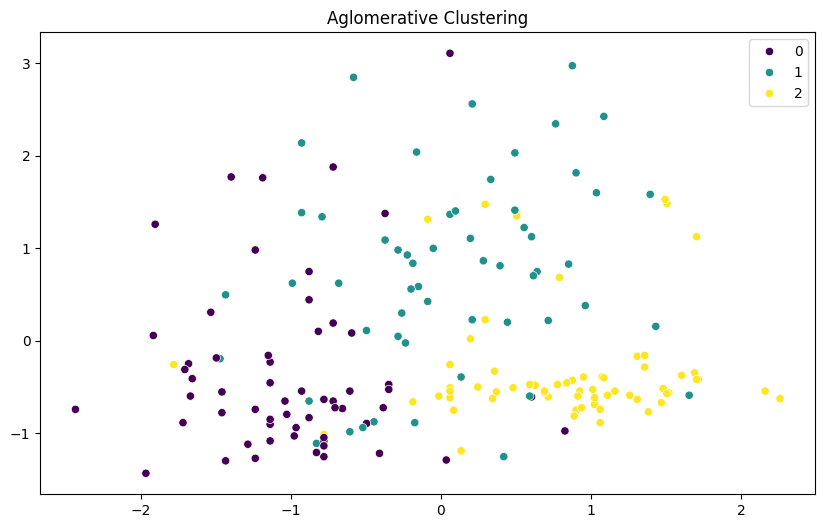

In [109]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(data_scaled)

# Avaliação usando a medida de Silhouette
silhouette_agg = silhouette_score(data_scaled, agg_labels)
davies_bouldin_agg = davies_bouldin_score(data_scaled, agg_labels)
sse_agg = calculate_sse(data_scaled, agg_labels)
rand_index_agg = adjusted_rand_score(true_labels, agg_labels)

print(f'Silhouette Score para Aglomerative Clustering: {silhouette_agg}')
print(f'Davies-Bouldin Score para Aglomerative Clustering: {davies_bouldin_agg}')
print(f'SSE Aglomerative Clustering: {sse_agg}')
print(f'RandIndex Aglomerative Clustering: {rand_index_agg}')

unique_labels, counts = np.unique(agg_labels, return_counts=True)

results = dict(zip(unique_labels, counts))
print(f'Total elementos por grupo: {results}')

# Visualização dos resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=agg_labels, palette='viridis')
plt.title('Aglomerative Clustering')
plt.show()

# Meanshift

Silhouette Score para MeanShift: 0.22447619269259034
Davies-Bouldin Score para MeanShift: 1.3200588029456868
SSE MeanShift: 2232.3733391362875
RandIndex MeanShift: -0.0064242403723043275
Total elementos por grupo: {0: 174, 1: 4}


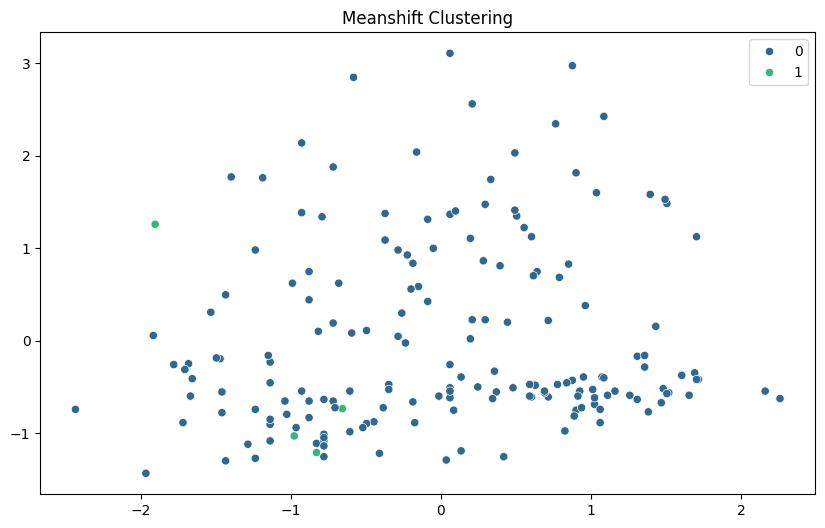

In [110]:
# Aplicar MeanShift
meanshift = MeanShift(bandwidth=4)
meanshift_labels = meanshift.fit_predict(data_scaled)

# Avaliação usando a medida de Silhouette
silhouette_meanshift = silhouette_score(data_scaled, meanshift_labels)
davies_bouldin_meanshift = davies_bouldin_score(data_scaled, meanshift_labels)
sse_meanshift = calculate_sse(data_scaled, meanshift_labels)
rand_index_meanshift = adjusted_rand_score(true_labels, meanshift_labels)

print(f'Silhouette Score para MeanShift: {silhouette_meanshift}')
print(f'Davies-Bouldin Score para MeanShift: {davies_bouldin_meanshift}')
print(f'SSE MeanShift: {sse_meanshift}')
print(f'RandIndex MeanShift: {rand_index_meanshift}')

unique_labels, counts = np.unique(meanshift_labels, return_counts=True)

results = dict(zip(unique_labels, counts))
print(f'Total elementos por grupo: {results}')

# Visualização dos resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=meanshift_labels, palette='viridis')
plt.title('Meanshift Clustering')
plt.show()


In [111]:
# Comparação dos Resultados
results = pd.DataFrame({
    'Algoritmo': ['K-Means', 'Aglomerative Clustering', 'Meanshift'],
    'Silhouette Score': [silhouette_kmeans, silhouette_agg, silhouette_meanshift],
    'Davies-Bouldin Score': [davies_bouldin_kmeans, davies_bouldin_agg, davies_bouldin_meanshift],
    'SSE Score': [sse_kmeans, sse_agg, sse_meanshift],
    'RandIndex Score': [rand_index_kmeans, rand_index_agg, rand_index_meanshift]
})

print(results)

                 Algoritmo  Silhouette Score  Davies-Bouldin Score  \
0                  K-Means          0.284859              1.389188   
1  Aglomerative Clustering          0.277444              1.418592   
2                Meanshift          0.224476              1.320059   

     SSE Score  RandIndex Score  
0  1277.928489         0.897495  
1  1305.048695         0.789933  
2  2232.373339        -0.006424  


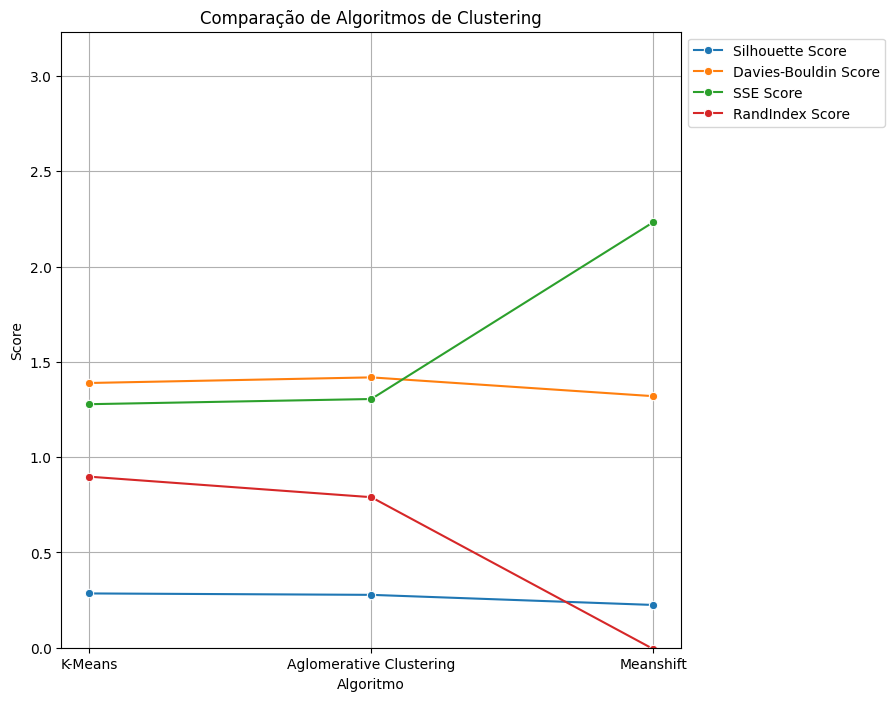

In [117]:

results_processed = pd.DataFrame({
    'Algoritmo': ['K-Means', 'Aglomerative Clustering', 'Meanshift'],
    'Silhouette Score': [silhouette_kmeans, silhouette_agg, silhouette_meanshift],
    'Davies-Bouldin Score': [davies_bouldin_kmeans, davies_bouldin_agg, davies_bouldin_meanshift],
    'SSE Score': [sse_kmeans/1000, sse_agg/1000, sse_meanshift/1000],
    'RandIndex Score': [rand_index_kmeans, rand_index_agg, rand_index_meanshift]
})
# Transformando o DataFrame para o formato long para uso com Seaborn
results_melted = results_processed.melt(id_vars='Algoritmo', var_name='Métrica', value_name='Score')

# Configurando o tamanho da figura
plt.figure(figsize=(8, 8))

# Plotando com Seaborn
sns.lineplot(data=results_melted, x='Algoritmo', y='Score', hue='Métrica', marker='o')

# Ajustando limites dos eixos se necessário
plt.ylim(0, results_melted['Score'].max() + 1)

# Adicionando título e rótulos
plt.title('Comparação de Algoritmos de Clustering')
plt.xlabel('Algoritmo')
plt.ylabel('Score')
plt.grid(True)

# Melhorar a legibilidade das legendas
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exibindo o gráfico
plt.show()

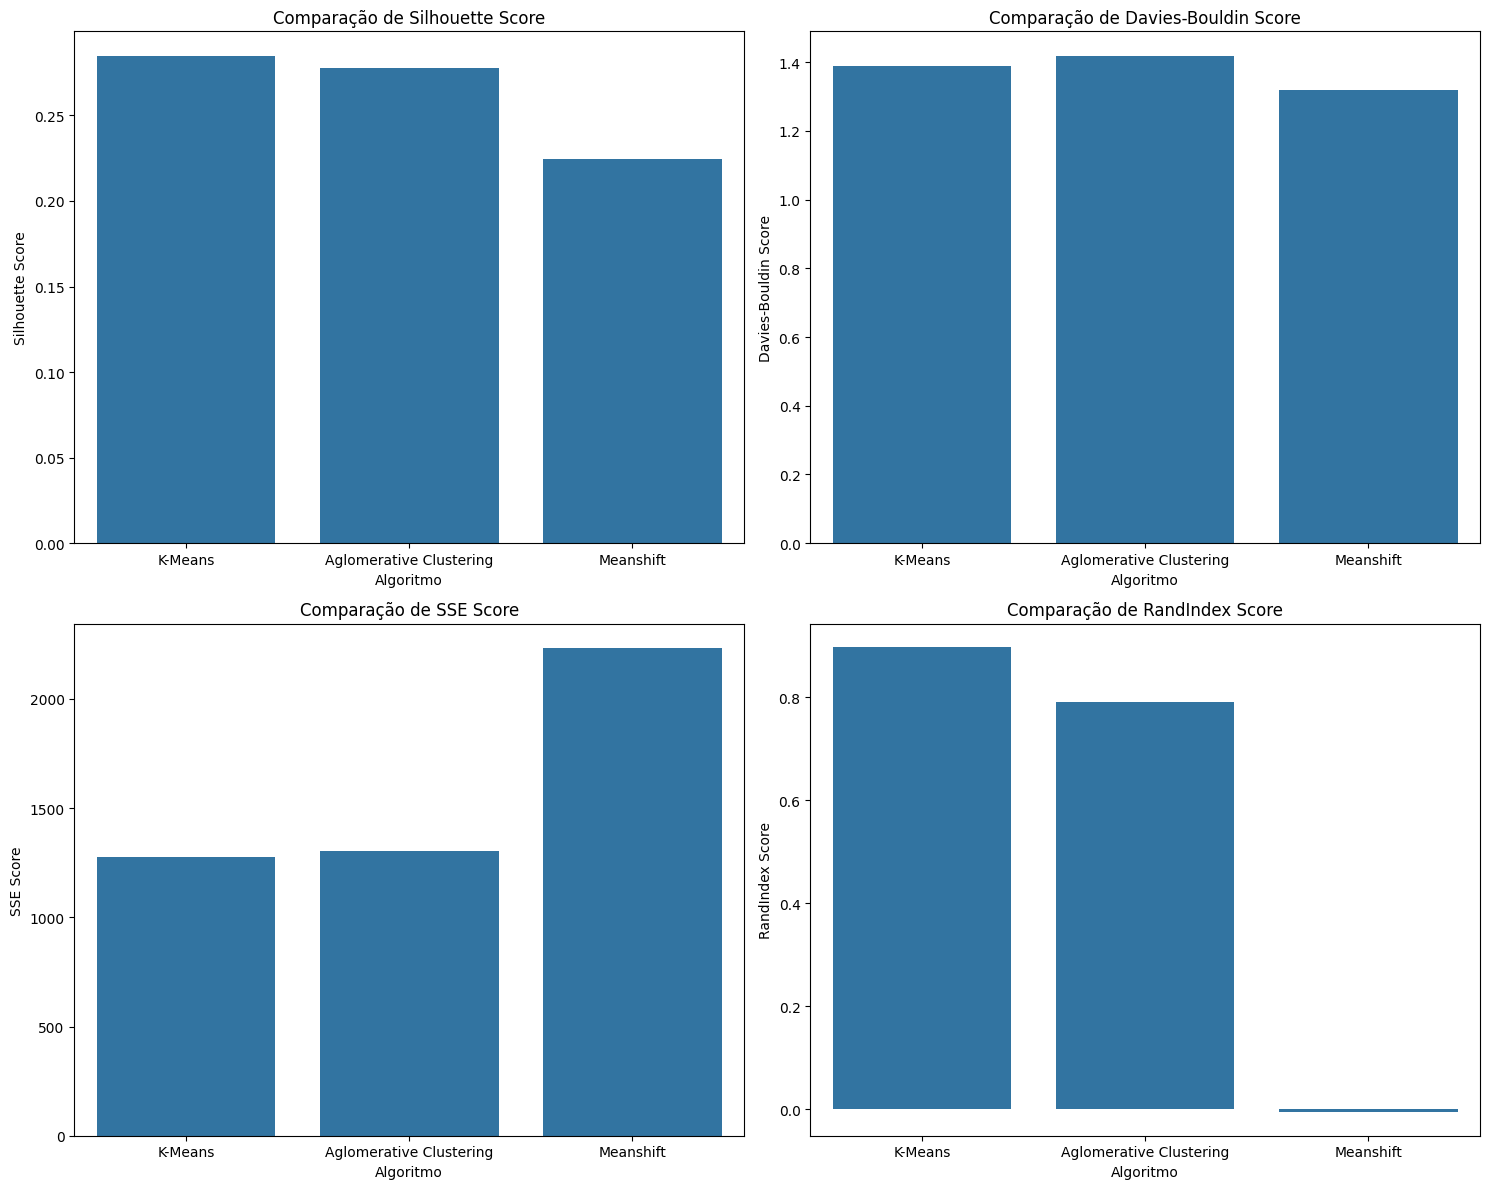

In [124]:
# Plotar as métricas de avaliação
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Plotar Silhouette Score
sns.barplot(x='Algoritmo', y='Silhouette Score', data=results, ax=ax[0, 0])
ax[0, 0].set_title('Comparação de Silhouette Score')

# Plotar Davies-Bouldin Score
sns.barplot(x='Algoritmo', y='Davies-Bouldin Score', data=results, ax=ax[0, 1])
ax[0, 1].set_title('Comparação de Davies-Bouldin Score')

# Plotar SSE
sns.barplot(x='Algoritmo', y='SSE Score', data=results, ax=ax[1, 0])
ax[1, 0].set_title('Comparação de SSE Score')

# Plotar Rand Index
sns.barplot(x='Algoritmo', y='RandIndex Score', data=results, ax=ax[1, 1])
ax[1, 1].set_title('Comparação de RandIndex Score')

plt.tight_layout()
plt.show()

In [114]:
# Determinar o melhor algoritmo com base nas métricas
best_silhouette = results.loc[results['Silhouette Score'].idxmax()]
best_davies_bouldin = results.loc[results['Davies-Bouldin Score'].idxmin()]
best_sse = results.loc[results['SSE Score'].idxmin()]
best_rand_index = results.loc[results['RandIndex Score'].idxmax()]

print(f"Melhor Algoritmo com base no Silhouette Score: {best_silhouette['Algoritmo']} com Silhouette Score de {best_silhouette['Silhouette Score']}")
print(f"Melhor Algoritmo com base no Davies-Bouldin Score: {best_davies_bouldin['Algoritmo']} com Davies-Bouldin Score de {best_davies_bouldin['Davies-Bouldin Score']}")
print(f"Melhor Algoritmo com base no SSE Score: {best_sse['Algoritmo']} com SSE Score de {best_sse['SSE Score']}")
print(f"Melhor Algoritmo com base no RandIndex Score: {best_sse['Algoritmo']} com RandIndex Score de {best_sse['RandIndex Score']}")

Melhor Algoritmo com base no Silhouette Score: K-Means com Silhouette Score de 0.2848589191898987
Melhor Algoritmo com base no Davies-Bouldin Score: Meanshift com Davies-Bouldin Score de 1.3200588029456868
Melhor Algoritmo com base no SSE Score: K-Means com SSE Score de 1277.9284888446423
Melhor Algoritmo com base no RandIndex Score: K-Means com RandIndex Score de 0.8974949815093207
